In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import os
path = "/content/gdrive/My Drive/Colab Notebooks/CMPT733/Project"
os.chdir(path)
os.listdir(path)

['calendar.csv',
 'listings.csv',
 'reviews.csv',
 'pccf_record_layout.csv',
 'Part2.ipynb',
 'property_tax_report_2021.csv',
 'pccfNat_fccpNat_052021.txt',
 '98-401-X2021025_English_CSV_data.csv',
 'cultural-spaces.csv']

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

# 2.1 Airbnb

In [5]:
df_listings = pd.read_csv("listings.csv")
df_calendar = pd.read_csv('calendar.csv')
df_reviews = pd.read_csv('reviews.csv')
df_calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,13358,2022-12-11,f,$150.00,$150.00,3.0,90.0
1,13358,2022-12-12,t,$150.00,$150.00,3.0,90.0
2,13358,2022-12-13,t,$150.00,$150.00,3.0,90.0


In [6]:
len(df_listings)

5676

In [7]:
df_listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

## Add neighbourhoods of Vancouver
### Downtown peninsula, East Side, West Side

In [8]:
def label_neighbourhood(value):
    if value in ["West End", "Yaletown", "Downtown Eastside", "Downtown"]:
        return "Downtown peninsula"
    if value in ["Kensington-Cedar Cottage", "Hastings-Sunrise", "Grandview-Woodland", "Renfrew-Collingwood", "Mount Pleasant", "Riley Park", "Strathcona",
                 "Sunset", "Victoria-Fraserview","Killarney"]:
        return "East Side"
    if value in ["Kitsilano", "Arbutus Ridge", "Dunbar Southlands", "Fairview", "South Cambie", "West Point Grey", "Marpole", "Kerrisdale",
                 "Shaughnessy", "Oakridge"]:
        return "West Side"
df_listings["neighbourhood_group"] = df_listings['neighbourhood'].map(label_neighbourhood)
# df_listings.isnull().sum()

In [9]:
data = df_listings.copy()

In [10]:
data.neighbourhood_group.unique()

array(['Downtown peninsula', 'East Side', 'West Side'], dtype=object)

In [11]:
#Downtown peninsula
sub_1=data.loc[data['neighbourhood_group'] == 'Downtown peninsula']
price_sub1=sub_1[['price']]
#East Side
sub_2=data.loc[data['neighbourhood_group'] == 'East Side']
price_sub2=sub_2[['price']]
#West Side
sub_3=data.loc[data['neighbourhood_group'] == 'West Side']
price_sub3=sub_3[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3]

In [12]:
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Downtown peninsula', 'East Side', 'West Side']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Downtown peninsula,East Side,West Side
Stats,,,
min,27.0,20.0,28.0
25%,120.0,87.0,95.0
50%,156.0,122.0,139.0
75%,225.0,182.0,221.0
max,119149.0,99120.0,20000.0


In [13]:
sub_6=data[data.price < 600]
fig = go.Figure()
days = ['Downtown peninsula', 'East Side', 'West Side']
for day in days:
    fig.add_trace(go.Violin(x=sub_6['neighbourhood_group'][sub_6['neighbourhood_group'] == day],
                            y=sub_6['price'][sub_6['neighbourhood_group'] == day],
                            name=day,
                            box_visible=True,
                            meanline_visible=True))
fig.update_layout(
    title_text="Density and distribution of prices for each neighberhood_group")
fig.show()

In [14]:
import plotly.express as px

fig = px.scatter_mapbox(sub_6, lat='latitude', lon='longitude', color='price',
                        color_continuous_scale='jet', size='availability_365',
                        hover_name='name', size_max=6, zoom=10, height=600)

fig.update_layout(mapbox_style='open-street-map')
fig.show()


In [15]:
# def handle_price(df):
#     df['price']=df['price'].map(lambda v: float(v[1:].replace(",","")) if type(v) != float else v)
#     return df

In [16]:
# handle_price(df_calendar)

In [17]:
df_calendar['available'].replace({'t':1,'f':0},inplace=True)
df_calendar['month']=pd.DatetimeIndex(df_calendar['date']).month
df_calendar['year']=pd.DatetimeIndex(df_calendar['date']).year
df_calendar['year'] = df_calendar['year'] - 1
df_calendar['Month_Year'] = pd.to_datetime(df_calendar['date'])
# df_calendar['Month_Year'] = df_calendar['Month_Year'] - pd.DateOffset(years=1)
df_calendar['Month_Year'] = df_calendar['Month_Year'].dt.to_period('M')

df_calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month,year,Month_Year
0,13358,2022-12-11,0,$150.00,$150.00,3.0,90.0,12,2021,2022-12
1,13358,2022-12-12,1,$150.00,$150.00,3.0,90.0,12,2021,2022-12
2,13358,2022-12-13,1,$150.00,$150.00,3.0,90.0,12,2021,2022-12
3,13358,2022-12-14,1,$150.00,$150.00,3.0,90.0,12,2021,2022-12
4,13358,2022-12-15,1,$150.00,$150.00,3.0,90.0,12,2021,2022-12


## Availibility during the Next 12 months

<Axes: title={'center': 'Avg Availability per Month'}, xlabel='Month_Year', ylabel='avg_availability'>

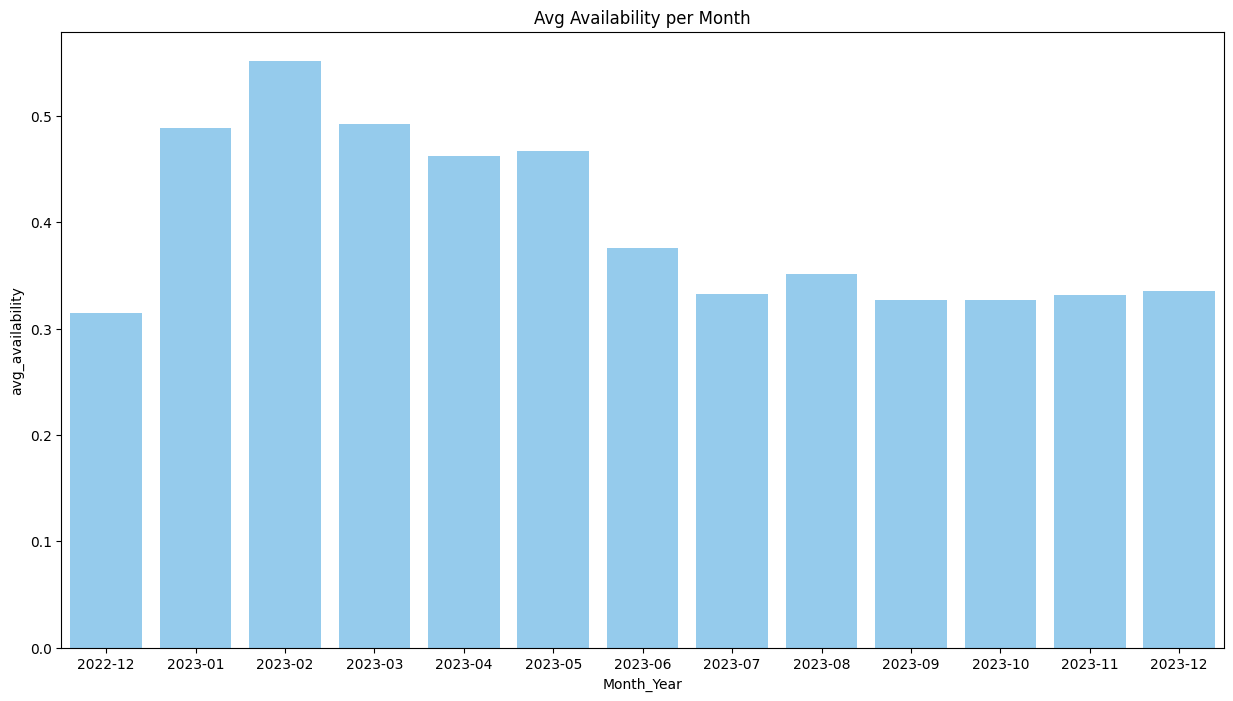

In [18]:
availibility=df_calendar.groupby('Month_Year')['available'].mean().reset_index().rename(columns={'available':'avg_availability'})

x=availibility['Month_Year']
y=availibility['avg_availability']

plt.figure(figsize=(15,8))
plt.title("Avg Availability per Month")

sns.barplot(data=availibility,x='Month_Year',y='avg_availability',color= 'LightSkyBlue',palette=None)
# availibility.sort_values(by='avg_availability',ascending=False)


In [19]:
avail_listing_cond = df_calendar['available'] == 1  # select all available listing
avail_listing_df = df_calendar.loc[avail_listing_cond, :]

list_mon_grouped = avail_listing_df.groupby('month').count()
# ax2_2 = sns.barplot(x=list_mon_grouped.index.values, y=list_mon_grouped['listing_id'].values)
# ax2_2.set_ylim(50000, 300000)
# ax2_2.set_ylabel("Number of listing")
# ax2_2.set_xlabel("Month")
# ax2_2.set_title("Distribution of listing from January to December")

import plotly.graph_objs as go

trace = go.Bar(
    x=list_mon_grouped.index.values,
    y=list_mon_grouped['listing_id'].values,
    marker=dict(color='PowderBlue')
)
layout = go.Layout(
    xaxis=dict(title='Month'),
    yaxis=dict(title='Number of listing', range=[50000, 90000]),
    title='Distribution of listing from January to December'
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [20]:
fig = px.histogram(df_listings, x='neighbourhood_group', color='room_type')
fig.update_layout(xaxis_tickangle=-90,
                  xaxis_title='Neighbourhood_group', yaxis_title='# of listings')
fig.show()

In [21]:
# new = df_reviews.groupby(['Month']).count()[['reviewer_id']].sort_values(by = 'reviewer_id', ascending = False)
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218099 entries, 0 to 218098
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  218099 non-null  int64 
 1   date        218099 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


## Top neighbour

In [22]:
Top_neighbour_per_price=df_listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).reset_index().rename(columns={'price':'avg_price'})

x=Top_neighbour_per_price['neighbourhood'].head(5)
y=Top_neighbour_per_price['avg_price'].head(5)

# plt.figure(figsize=(15,8))
# plt.title("Top neighbourhood in terms of Price/night")
# sns.barplot(data=Top_neighbour_per_price,x=x,y=y,color='PowderBlue',palette=None)
# Top_neighbour_per_price.head(5)

# fig = px.bar(x=x, y=y, title="Top neighbourhood in terms of average price/night")
# fig.update_layout(xaxis_title='Neighbourhood_group', yaxis_title='Price')
# fig.show()

fig = px.bar(x=x, y=y, title="Top neighbourhood in terms of average price/night", color=x)
fig.update_layout(xaxis_title='Neighbourhood_group', yaxis_title='Price')
fig.show()

# 2.2 BC Assessment

In [23]:
BCA_df = pd.read_csv("property_tax_report_2021.csv", sep=';')

BCA_df['CURRENT_PRICE'] = BCA_df.apply(lambda x: x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

BCA_df['PREVIOUS_PRICE'] = BCA_df.apply(lambda x: x['PREVIOUS_LAND_VALUE']+x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)


In [24]:
rldf = pd.read_csv('pccf_record_layout.csv')
# load the raw text pccf file
with open('pccfNat_fccpNat_052021.txt','r', encoding='latin-1') as fh:
    pctxt = fh.read()
pclines = pctxt.split('\n')
pclines = list(filter(lambda l: len(l), pclines)) # keep only non-empty lines

pclines_tmp = pd.Series(pclines)
def gen_pccf():
    for idx, r in rldf.iterrows():
        slice_values = pclines_tmp.str[r['Position']-1:r['Position']+r['Size']-1]
        yield r['Field name'], slice_values
pccf_df = pd.DataFrame(dict(gen_pccf()))

pccf_df['LAT'] = pccf_df['LAT'].astype(float)
pccf_df['LONG'] = pccf_df['LONG'].astype(float)
pccf_short = pccf_df[['Postal code', 'LONG', 'LAT', 'CSDname']]
pccf_short = pccf_short.groupby('Postal code').agg({'LONG':'mean','LAT':'mean','CSDname':'first'})

In [60]:
BCA_df['Postal code'] = BCA_df['PROPERTY_POSTAL_CODE'].str.replace(' ','')
dfgeo = BCA_df.merge(pccf_short, on='Postal code')
dfgeo.head(5)

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONING_DISTRICT,ZONING_CLASSIFICATION,LOT,PLAN,BLOCK,DISTRICT_LOT,...,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE,Postal code,LONG,LAT,CSDname
0,002-582-759,STRATA,90717090036,9071709,CD-1 (94),Comprehensive Development,36,VAS452,NaN,526,...,1977.0,3644.37,4,2021,1247000.0,1130000.0,V6L3C7,-123.154007,49.247557,Vancouver ...
1,004-050-002,STRATA,90717090032,9071709,CD-1 (94),Comprehensive Development,32,VAS452,NaN,526,...,1982.0,3767.11,4,2021,1289000.0,1302000.0,V6L3C7,-123.154007,49.247557,Vancouver ...
2,004-050-002,STRATA,90717090032,9071709,CD-1 (94),Comprehensive Development,32,VAS452,NaN,526,...,1982.0,3809.24,4,2020,1302000.0,1680000.0,V6L3C7,-123.154007,49.247557,Vancouver ...
3,004-049-985,STRATA,90717090030,9071709,CD-1 (94),Comprehensive Development,30,VAS452,NaN,526,...,1977.0,3788.75,4,2020,1295000.0,1674000.0,V6L3C7,-123.154007,49.247557,Vancouver ...
4,004-049-977,STRATA,90717090029,9071709,CD-1 (94),Comprehensive Development,29,VAS452,NaN,526,...,1977.0,3752.49,4,2021,1284000.0,1295000.0,V6L3C7,-123.154007,49.247557,Vancouver ...


In [52]:
dfgeo_van = dfgeo[dfgeo['LAT'] < 49.31]

sample = dfgeo_van.sample(frac=0.1, random_state=42) 

fig = px.scatter_mapbox(sample, lat='LAT', lon='LONG', color= "CURRENT_PRICE", 
                        color_continuous_scale='jet', size_max=6, zoom=10,
                        mapbox_style='open-street-map')

fig.show()

Output hidden; open in https://colab.research.google.com to view.

**House price itself has little impact on Airbnb pricing.** \\
House prices and Airbnb pricing are driven by different factors. House prices are typically influenced by factors like location, size, condition, and local real estate market trends. On the other hand, Airbnb pricing is influenced by factors such as short-term demand, seasonality, the host's desired income, and the amenities offered. While the location can affect both, the unique characteristics of short-term rentals make it so that Airbnb pricing is less dependent on the local housing market. Hosts often have more flexibility in adjusting their rates based on various factors, like local events, tourist season, or even personal preferences, making the connection between house prices and Airbnb pricing relatively weak.

# 2.3 Census

In [48]:
# cen_df = pd.read_csv("98-401-X2021025_English_CSV_data.csv", encoding='latin-1')

In [51]:
# cen_df_van = cen_df[(cen_df["GEO_NAME"] == "Metro Vancouver A, Regional district electoral area (RDA)") |
#                     (cen_df["GEO_NAME"] == "Vancouver, City (CY)")]
# # cen_df_van.to_csv("tmp.csv")

# display(cen_df_van)

# 2.4 Cultural Hotspot: points of interest

In [53]:
df_hotspot = pd.read_csv("cultural-spaces.csv", sep=';')

df_hotspot_filter = df_hotspot[["TYPE", "Geom", "geo_point_2d"]]
df_hotspot_filter.head(5)

,TYPE,Geom,geo_point_2d
0,Museum/Gallery,"{""coordinates"": [-123.151123, 49.261938], ""typ...","49.261938, -123.151123"
1,Studio/Rehearsal,"{""coordinates"": [-123.101791, 49.281101], ""typ...","49.281101, -123.101791"
2,Museum/Gallery,"{""coordinates"": [-123.2549451, 49.2639124], ""t...","49.2639124, -123.2549451"
3,Educational,"{""coordinates"": [-123.0864434, 49.2810234], ""t...","49.2810234, -123.0864434"
4,Studio/Rehearsal,"{""coordinates"": [-123.075559, 49.277071], ""typ...","49.277071, -123.075559"


In [54]:
df_hotspot['latitude'] = df_hotspot['geo_point_2d'].apply(lambda x: float(x.split(',')[0]))
df_hotspot['longitude'] = df_hotspot['geo_point_2d'].apply(lambda x: float(x.split(',')[1]))

fig = go.Figure(go.Scattermapbox(lat=df_hotspot['latitude'],
                                 lon=df_hotspot['longitude'],
                                 text=df_hotspot['TYPE'],
                                 mode='markers',
                                 marker=go.scattermapbox.Marker(size=10, color='green', opacity=0.7)))

# Set the mapbox style and layout
fig.update_layout(mapbox_style='open-street-map', mapbox_zoom=12, mapbox_center_lat=49.281, mapbox_center_lon=-123.14)

fig.show()

In [59]:
trace1 = go.Scattermapbox(lat=df_hotspot['latitude'],
                          lon=df_hotspot['longitude'],
                          text=df_hotspot['TYPE'],
                          name='Hotspot Types',
                          mode='markers',
                          marker=dict(size=7, color='Orange'))

trace2 = go.Scattermapbox(lat=sub_6['latitude'],
                          lon=sub_6['longitude'],
                          text=sub_6['name'],
                          name='Airbnb Locations',
                          mode='markers',
                          marker=dict(size=sub_6['availability_365'] / max(sub_6['availability_365']) * 6,
                                      color=sub_6['price'],
                                      colorscale='Jet',
                                      showscale=True),
                          hoverinfo='text')

# Combine both traces into a single figure
fig = go.Figure([trace1, trace2])

# Set the mapbox style and layout
fig.update_layout(mapbox_style='carto-positron', mapbox_zoom=12, mapbox_center_lat=49.281, mapbox_center_lon=-123.14)

fig.show()

The Airbnb price is positively correlated with the presence of Cultural Hotspots. A higher concentration of Cultural Hotspots leads to more Airbnb listings and typically results in higher prices, as these areas are in higher demand due to their cultural attractions.